In [59]:
import pandas as pd
fish = pd.read_csv("fish2.csv")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [60]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [61]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [62]:
X = fish.drop("Species", axis = 1)
Y = fish['Species']

In [63]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2,
                                                   stratify=Y)

In [64]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier

In [65]:
box1 = {"SS" : StandardScaler(), "RO": RobustScaler(),
        "MM" : MinMaxScaler(), "MA" : MaxAbsScaler()}
box2 = ["euclidean", "manhattan"]

total = []

for i in box1:
    for j in box2:

        scaler = box1[i]
        train_scaled = scaler.fit_transform(train_x)
        test_scaled = scaler.transform(test_x)

        model = KNeighborsClassifier(metric=j)
        model.fit(train_scaled, train_y)
        
        for k in range(1, 31):
            model.n_neighbors = k
            score = model.score(test_scaled, test_y)
            total.append([i, j, k, score])

In [66]:
pd.DataFrame(total, columns = ['표준화', '거리계산', '이웃수', '정확도']).sort_values("정확도", ascending = False)

,표준화,거리계산,이웃수,정확도
2,SS,euclidean,3,0.87500
62,RO,euclidean,3,0.87500
182,MA,euclidean,3,0.87500
122,MM,euclidean,3,0.87500
61,RO,euclidean,2,0.84375
...,...,...,...,...
118,RO,manhattan,29,0.46875
119,RO,manhattan,30,0.46875
29,SS,euclidean,30,0.46875
28,SS,euclidean,29,0.46875


In [67]:
mm = MinMaxScaler()
train_scaled = mm.fit_transform(train_x)
test_scaled = mm.transform(test_x)

model = KNeighborsClassifier(metric="euclidean", n_neighbors=1)
model.fit(train_scaled, train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [68]:
from sklearn.metrics import classification_report
pred = model.predict(test_scaled)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00         7
      Parkki       1.00      1.00      1.00         2
       Perch       0.75      0.82      0.78        11
        Pike       1.00      1.00      1.00         4
       Roach       0.50      0.25      0.33         4
       Smelt       1.00      1.00      1.00         3
   Whitefish       0.00      0.00      0.00         1

    accuracy                           0.81        32
   macro avg       0.75      0.72      0.73        32
weighted avg       0.82      0.81      0.81        32



In [69]:
# 타이타닉 생존자/사망자 데이터로 분류 모델 복습하기!
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
df = df.dropna()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [72]:
embarked_dic = {}
for i in df['Embarked']:
    if i not in embarked_dic:
        embarked_dic[i] = len(embarked_dic)

df['Embarked'] = df['Embarked'].map(embarked_dic)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,1
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,1
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1


In [73]:
df = pd.read_csv("titanic.csv")
df['Age'] = df['Age'].fillna(df["Age"].mean())

In [74]:
del df['Cabin']

In [75]:
df['Embarked'] = df['Embarked'].fillna("?")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [77]:
del df['Name']
del df['Ticket']
del df['PassengerId']

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [79]:
encoder.classes_

array(['?', 'C', 'Q', 'S'], dtype=object)

In [80]:
df['Sex'] = encoder.fit_transform(df['Sex'])
encoder.classes_

array(['female', 'male'], dtype=object)

In [81]:
X = df.drop("Survived", axis = 1)
Y = df['Survived']

In [82]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

In [83]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [84]:
model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

KNeighborsClassifier()

In [85]:
box = []
for n in range(1, 31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    print(n, score)
    box.append(score)

1 0.7533632286995515
2 0.7892376681614349
3 0.8026905829596412
4 0.8251121076233184
5 0.8026905829596412
6 0.8251121076233184
7 0.8026905829596412
8 0.8251121076233184
9 0.8295964125560538
10 0.8340807174887892
11 0.8116591928251121
12 0.8161434977578476
13 0.820627802690583
14 0.8340807174887892
15 0.8385650224215246
16 0.8430493273542601
17 0.8430493273542601
18 0.8430493273542601
19 0.8295964125560538
20 0.8295964125560538
21 0.8251121076233184
22 0.8295964125560538
23 0.8251121076233184
24 0.8251121076233184
25 0.820627802690583
26 0.8251121076233184
27 0.8295964125560538
28 0.8251121076233184
29 0.8340807174887892
30 0.8251121076233184


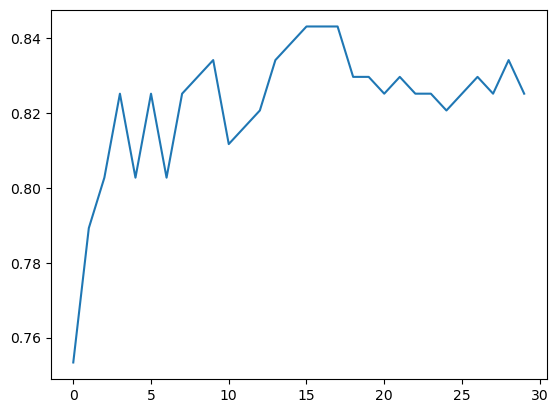

In [86]:
import matplotlib.pyplot as plt
plt.plot(box)
plt.show()

In [87]:
model.n_neighbors = 15

In [88]:
pred = model.predict(test_scaled)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       137
           1       0.81      0.76      0.78        86

    accuracy                           0.84       223
   macro avg       0.83      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [89]:
# 회귀 모델
perch = pd.read_csv("perch.csv")
perch.head()

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


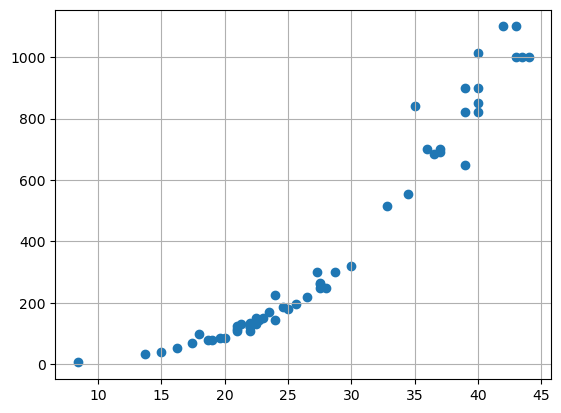

In [90]:
plt.scatter(perch['length'], perch['weight'])
plt.grid()
plt.show()

In [94]:
X = perch[['length']].values
Y = perch['weight'].values
X.shape, Y.shape

((56, 1), (56,))

In [95]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [111]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=3)

In [112]:
print(model.score(train_x, train_y))
print(model.score(test_x, test_y))

0.9803047715369394
0.9845930966998715


In [102]:
pred = model.predict(train_x)
pred

array([704.05 , 704.05 , 704.05 , 110.445, 704.05 , 164.75 , 119.55 ,
       127.4  , 164.75 , 704.05 , 153.75 , 704.05 , 704.05 , 127.4  ,
       704.05 , 704.05 , 127.4  , 127.4  , 200.05 , 200.05 , 127.4  ,
       663.9  , 704.05 , 351.05 , 127.4  , 704.05 , 127.4  , 704.05 ,
       119.55 , 119.55 , 704.05 , 200.05 , 164.75 , 119.55 , 110.445,
       127.4  , 265.3  , 119.55 , 176.5  , 704.05 , 136.4  , 119.55 ])

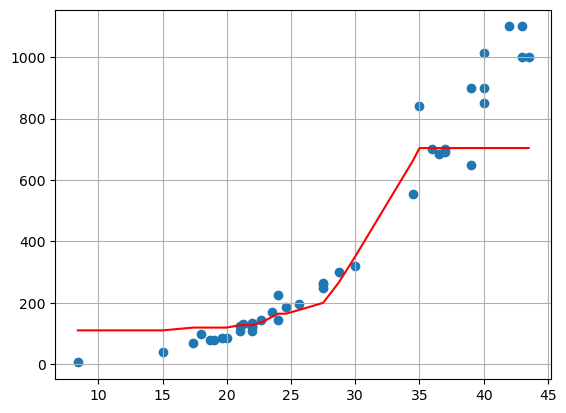

In [103]:
plt.scatter(train_x, train_y)
plt.plot(sorted(train_x), sorted(pred), color = 'red')
plt.grid()
plt.show()

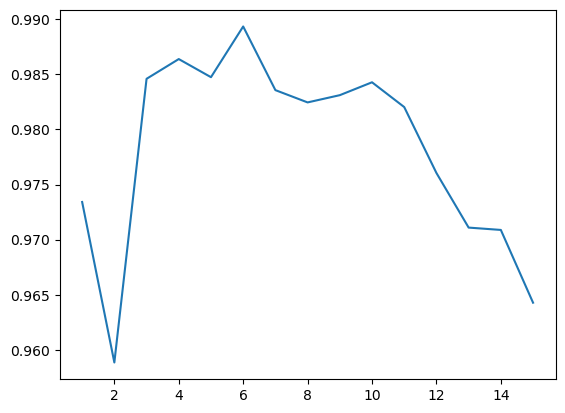

In [113]:
box = []
for n in range(1, 16):
    model.n_neighbors = n
    score = model.score(test_x, test_y)
    box.append(score)

plt.plot(range(1,16), box)
plt.show()

In [114]:
model.n_neighbors = 6

In [115]:
# R^2, MAE, RMSE
model.score(test_x, test_y)

0.9893419267156786

In [117]:
# MAE : 평균 절대 오차.
pred = model.predict(test_x)
abs(pred - test_y).mean()

23.332142857142856

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test_y, pred) # MAE

23.332142857142856

In [120]:
# MSE : 평균 제곱 오차.
((pred - test_y) ** 2).mean()

1006.288908730159

In [123]:
mean_squared_error(test_y, pred)

1006.288908730159

In [121]:
# RMSE : root(MSE)
(((pred - test_y) ** 2).mean()) ** (1/2)

31.722057132698048

In [ ]:
# RMSE = 10, MAE = 8 // 오차가 더 크지만, 예측 오류가 균일하다.
# RMSE = 12, MAE = 6 // 오차가 작긴하지만, 가끔 매우 큰 오류를 범하는 구나.

In [129]:
# weight 값을 예측하는 회귀 모델 만들기!
df = pd.read_csv("perch2.csv")

X = df.drop("weight", axis = 1).values
Y = df['weight'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

model = KNeighborsRegressor()
model.fit(train_scaled, train_y)

box = []
for n in range(1, 31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    box.append(score)

plt.plot(range(1,31), box)
plt.show()

KNeighborsRegressor()

In [130]:
box = []
for n in range(1, 31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    box.append(score)

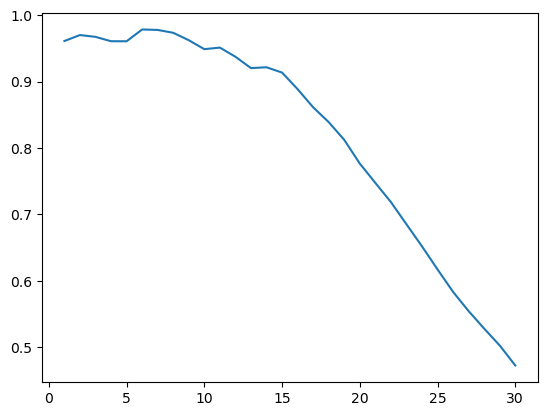

In [131]:
plt.plot(range(1,31), box)
plt.show()

In [132]:
model.n_neighbors = 3

In [133]:
model.score(test_scaled, test_y)

0.967230708762088

In [134]:
pred = model.predict(test_scaled)

In [135]:
mean_absolute_error(test_y, pred)

46.10714285714285

In [136]:
mean_squared_error(test_y, pred) ** (1/2)

59.289527033642415

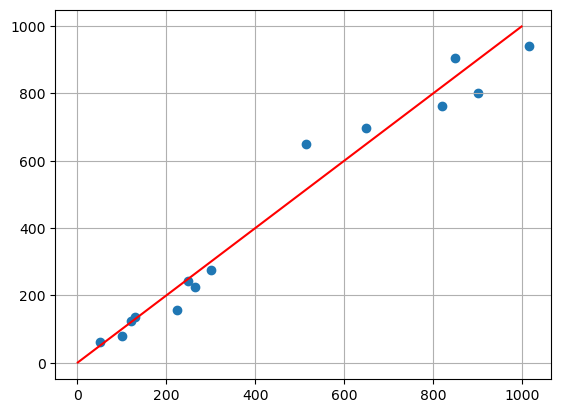

In [139]:
plt.scatter(test_y, pred)
plt.plot(range(1,1000), range(1, 1000), color = 'red')
plt.grid()
plt.show()

In [142]:
# 선형 회귀.
df = pd.read_csv("perch.csv")
df.head()

,length,weight
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0


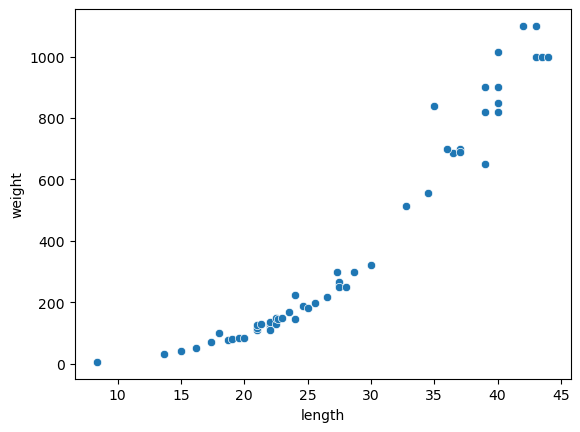

In [143]:
# K 최근접 단점 : 데이터가 크면 사용 X, 학습 범위를 벗어난 데이터를 예측 X

import seaborn as sns
sns.scatterplot(data=df, x = 'length', y = 'weight')
plt.show()

In [146]:
X = df[['length']].values
Y = df['weight'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [147]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8379148101601849

In [149]:
model.coef_[0] # 기울기.

38.57431802432945

In [150]:
model.intercept_ # 절편.

-703.9009132312409

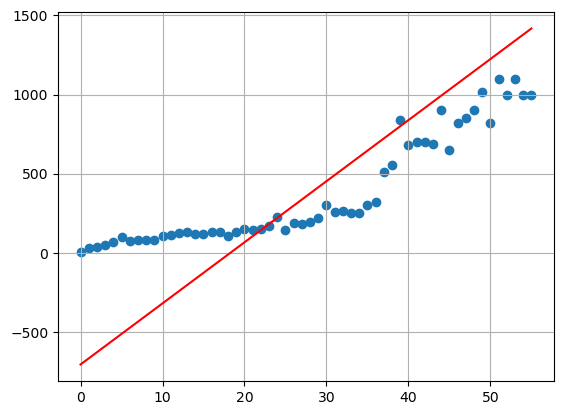

In [157]:
plt.scatter(range(len(df)), df['weight'])
plt.plot(range(len(df)), range(len(df)) * model.coef_[0] + model.intercept_, "red")
plt.grid()
plt.show()

In [176]:
df = pd.read_csv("perch.csv")
df['length ** 2'] = df['length'] ** 2

X = df.drop("weight", axis = 1).values
Y = df['weight'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [177]:
model.coef_

array([-24.02845441,   1.04500408])

In [178]:
model.intercept_

149.5680220159647

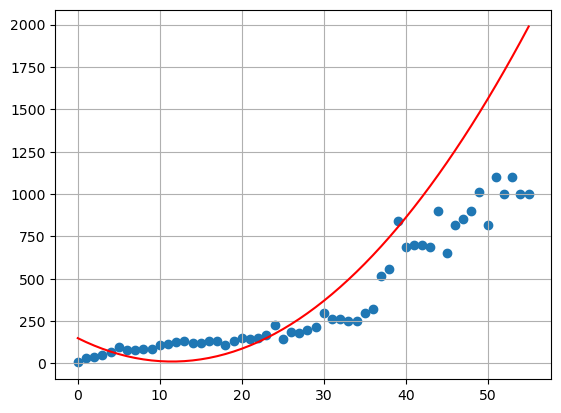

In [180]:
import numpy as np

plt.scatter(range(len(df)), df['weight'])
plt.plot(range(len(df)), 
         np.arange(len(df)) * model.coef_[0] + np.arange(len(df)) ** 2 * model.coef_[1] + model.intercept_, 'red')
plt.grid()
plt.show()

In [172]:
range(len(df)) * model.coef_[0] + range(len(df)) * model.coef_[1] * 2 + model.intercept_

array([-628.52675471, -591.99507126, -555.46338782, -518.93170437,
       -482.40002093, -445.86833748, -409.33665403, -372.80497059,
       -336.27328714, -299.7416037 , -263.20992025, -226.6782368 ,
       -190.14655336, -153.61486991, -117.08318647,  -80.55150302,
        -44.01981957,   -7.48813613,   29.04354732,   65.57523076,
        102.10691421,  138.63859766,  175.1702811 ,  211.70196455,
        248.23364799,  284.76533144,  321.29701489,  357.82869833,
        394.36038178,  430.89206522,  467.42374867,  503.95543212,
        540.48711556,  577.01879901,  613.55048245,  650.0821659 ,
        686.61384935,  723.14553279,  759.67721624,  796.20889968,
        832.74058313,  869.27226658,  905.80395002,  942.33563347,
        978.86731691, 1015.39900036, 1051.93068381, 1088.46236725,
       1124.9940507 , 1161.52573414, 1198.05741759, 1234.58910104,
       1271.12078448, 1307.65246793, 1344.18415137, 1380.71583482])

In [182]:
# 독립변수가 종속변수와 상관관계가 높으면 성능 GOOD
perch = pd.read_csv("perch2.csv")
perch.head()

,length,height,width,weight
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


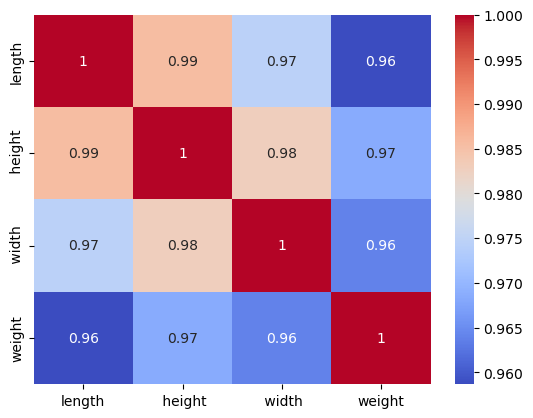

In [186]:
import seaborn as sns
corr = perch.corr()

sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [187]:
X = perch.drop("weight", axis = 1)
Y = perch['weight']

In [188]:
train_x, test_x, train_y, test_y = train_test_split(X, Y)

In [189]:
ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [190]:
model = LinearRegression()
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y) # R^2

0.9790250796335949

In [192]:
pred = model.predict(test_scaled)
mean_absolute_error(test_y, pred)

45.80205959225018

In [193]:
mean_squared_error(test_y, pred) ** (1/2)

50.33418133601584

In [194]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

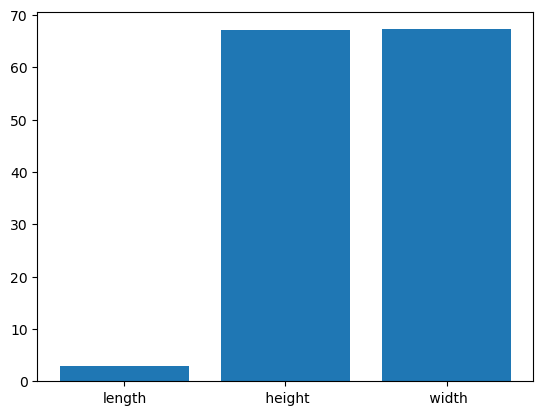

In [197]:
plt.bar(perch.columns[:-1], model.coef_)
plt.show()

In [201]:
# 릿지 회귀
from sklearn.linear_model import Ridge, Lasso, ElasticNet

model = Ridge(alpha=1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9799848355986378

In [199]:
# 라쏘 회귀.
model = Lasso(alpha=1)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.9790255280497903

In [200]:
model.coef_

array([ 11.8889975 , 224.89771621,  94.49929121])

In [203]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
model.fit(train_scaled, train_y)
model.score(test_scaled, test_y)

0.95667174382493